## Escuela Colombiana de Ingeniería Julio Garavito

### Programming for Data Analysis

### Author

Juan Pablo Sánchez Bermúdez

In [16]:
# Imports
library(data.table)
library(dplyr)
library(tidyverse)
library(visdat) # visualize missing data
library(devtools)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.0
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpo

# Alzheimer Features Data Set

### 1. Selecting and loading Data Set
I chose the [Alzheimer Features](https://www.kaggle.com/datasets/brsdincer/alzheimer-features) Data Set from Kaggle because I wanted to analyze another data set from scratch.

Group &rarr; Class

M/F &rarr; Male / Female

Age &rarr; Age

EDUC &rarr; Years of Education

SES &rarr; Socioeconomic Status / 1-5

MMSE &rarr; Mini Mental State Examination

CDR &rarr; Clinical Dementia Rating

eTIV &rarr; Estimated total intracranial volume

nWBV &rarr; Normalize Whole Brain Volume

ASF &rarr; Atlas Scaling Factor

In [2]:
# dataFrame <- read.table(file='alzheimer.csv',header=TRUE, sep=',')
dataFrame <- fread('alzheimer.csv')

# Rename M/F column
colnames(dataFrame)[2] <- "Gender"

head(dataFrame)

Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
Nondemented,M,87,14,2,27,0.0,1987,0.696,0.883
Nondemented,M,88,14,2,30,0.0,2004,0.681,0.876
Demented,M,75,12,NA,23,0.5,1678,0.736,1.046
Demented,M,76,12,NA,28,0.5,1738,0.713,1.010
Demented,M,80,12,NA,22,0.5,1698,0.701,1.034
Nondemented,F,88,18,3,28,0.0,1215,0.710,1.444


### 2. Missing values
Now that the data frame is set, let's get details about the missing values of the data frame.
  - Columns with missing values
  - Rows with missing values
  - A percentage of records with missing values
  - Graphics to visualize missing information

In [25]:
missingValues <- function(df) {
    print("Rows and Columns with missing values respectively")
    size <- dim(df)
    count <- 0
    state <- FALSE
    for (row in 1:size[1]) {
        for (column in 1:size[2]) {
            if (df[row, ..column] %in% "NA") {
                print(paste(row, column))
                state <- TRUE
            }
        }
        if (state) {
            count <- count + 1
            state <- FALSE
        }
    }
    percentage <- (count * 100) / size[1]
    print("------------------------------------------------------")
    print(paste(sprintf("The percentage of records with missing values is %.2f", percentage), "%"))
    print("------------------------------------------------------")
    print("Graphic to visualize missing information")
    vis_dat(df)
}

[1] "Rows and Columns with missing values respectively"
[1] "3 5"
[1] "4 5"
[1] "5 5"
[1] "11 5"
[1] "12 5"
[1] "13 5"
[1] "135 5"
[1] "136 5"
[1] "208 5"
[1] "209 5"
[1] "238 5"
[1] "239 5"
[1] "323 5"
[1] "324 5"
[1] "357 5"
[1] "358 5"
[1] "358 6"
[1] "359 5"
[1] "359 6"
[1] "360 5"
[1] "361 5"
[1] "------------------------------------------------------"
[1] "The percentage of records with missing values is 5.09 %"
[1] "------------------------------------------------------"
[1] "Graphic to visualize missing information"


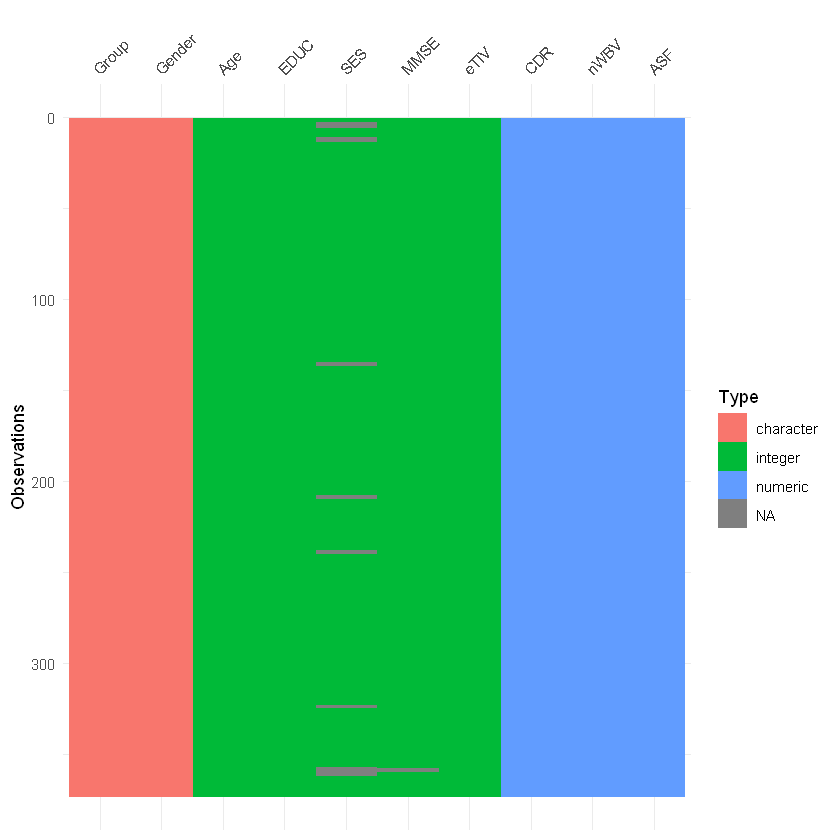

In [26]:
missingValues(dataFrame)